# Data Cleaning/Wrangling - Term Deposit Subscription

### Introduction

**Problem Gaol & Context:**

In the financial industry, a term deposit is a type of savings account offered by banks and financial institutions. It involves depositing a fixed amount of money for a specific period, often ranging from a few months to several years, at a fixed interest rate.
This project's client is a Portuguese bank aiming to improve their customer acquisition marketing strategies for term deposits. By identifying potential subscribers, the bank can tailor its marketing efforts to increase subscription rates. The insights gained from the model can drive targeted campaigns for reaching out to clients most likely to subscribe, optimizing marketing expenses and improving overall customer satisfaction.
This project will be working on predicting whether a customer will subscribe to a term deposit. This classification task aims to assist a financial institution in optimizing its marketing efforts by targeting potential customers who are more likely to subscribe to term deposits, thereby increasing the efficiency of their campaigns and ultimately improving the conversion rate.


### Input variables


   #### bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
   #### related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  * 10 - day: last contact day of the month (numeric)
  * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  * 12 - duration: last contact duration, in seconds (numeric)
   #### other attributes:
  * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
  * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Importing Libraries

In [1]:
# Importing relevant libraries
from pathlib import Path

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

### Loading The Data

In [2]:
# Download, unzip and load the 'bank-full' data.

outer_zip_file_url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip' 

outer_zip_response = requests.get(outer_zip_file_url)
with open('bank+marketing.zip', 'wb') as f:
    f.write(outer_zip_response.content)
    
with zipfile.ZipFile('bank+marketing.zip', 'r') as outer_zip:
    outer_zip.extractall('outer_folder')


inner_zip_path = 'outer_folder/bank.zip'

with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip:
    inner_zip.extractall('inner_folder')
    
csv_file_path = 'inner_folder/bank-full.csv'

In [3]:
df = pd.read_csv(csv_file_path, sep = ';')

### Initial Explorations

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# checking for missing values or duplicates.
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#looking at the data types. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Numerical Variables

In [8]:
#Looking at the numerical variables, their descriptive statistics and 
#frequency distributions to gain a general overview of the data.
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


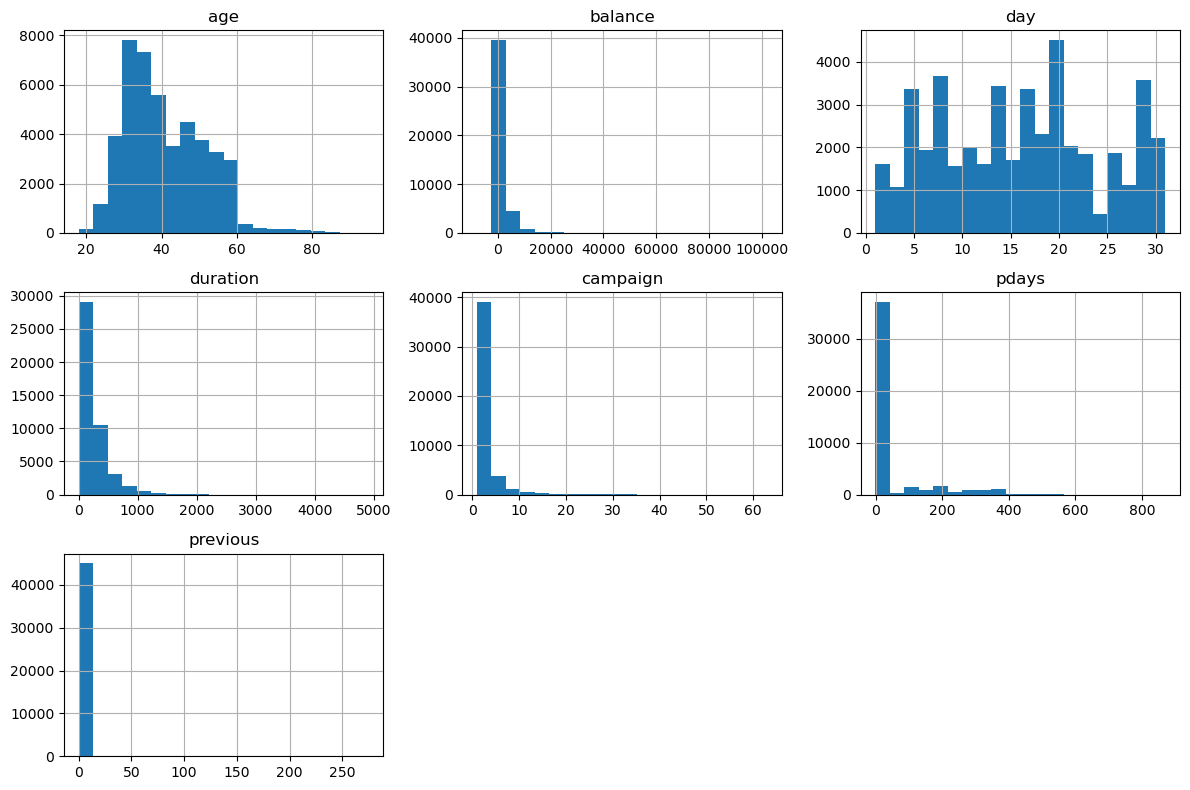

In [9]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

Looking at the descriptive statistic and frequency distribution of each numerical variable will allow us to identify possible out-of-range data, errors or any outliers.
From this, we can already see that:
* pdays, campaign, and duration are highly skewed and values are clustered down the low end.
* previous i.e. the number of times a client was contacted previously, has the least variablity, values are mostly 0.
* age, balance duration, and day all seem to fall within the normal range and have a more or less typical distribution.

In [10]:
#Further exploring numerical variables

In [11]:
df['previous'].value_counts()[0]

36954

In [12]:
# values that are -1 for pdays are customers who've never been previously contacted.
not_previously_contacted= df['pdays'].value_counts().get(-1)
not_previously_contacted

36954

In [13]:
total_values = df['pdays'].count()
pct_not_previously_contacted = (not_previously_contacted/total_values) * 100
pct_not_previously_contacted

81.73674548229414

In [14]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [15]:
df[df['campaign'] > 30].shape[0]

59

In [33]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

* We can see that, 81.7% of the clients were never previously contated for a previous campaign. And the number of clients not previously contacted from **`pdays`** checks out with the number of contacts made to those clients being 0 in **`previous`**. Thus the number is 0 for 87.7% of the clients in 'previous'.
* **`campaign`** does not seem to have that much extreme values. Although, the dataset has 59 instances with values greater than  30 which is the number of contacts performed during this campaign for a client And this might raise concerns. It is important to consider the span of time over which this campaign was running.
* The values for **`previous`** range between 0 to 58 with The value '275' being an outlier. This seems like a very large number that is likely an error.

### **Categorical Variables**

In [18]:
df.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [19]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

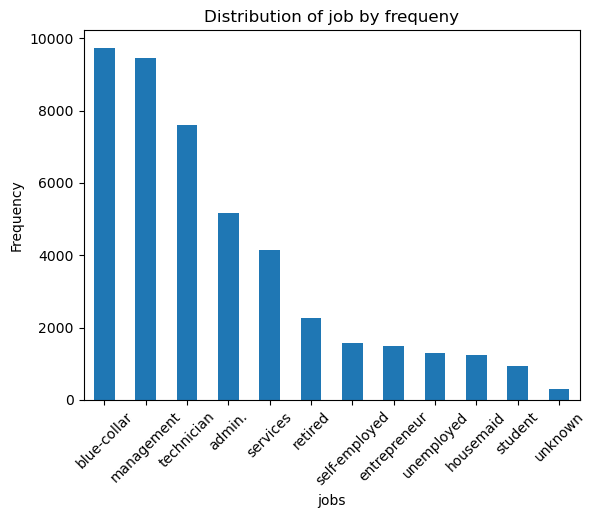

In [20]:
df['job'].value_counts().plot(kind='bar')
plt.xlabel('jobs')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Distribution of job by frequeny')
plt.show()

In [21]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [22]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [23]:
df['housing'].value_counts() 

yes    25130
no     20081
Name: housing, dtype: int64

In [24]:
df['loan'].value_counts()  

no     37967
yes     7244
Name: loan, dtype: int64

In [25]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [26]:
#converting 'month' into a date dtype
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].str.lower().map(month_mapping)
df['month'] = pd.to_datetime(df['month'], format="%m")

In [27]:
df['month'] = df['month'].dt.month

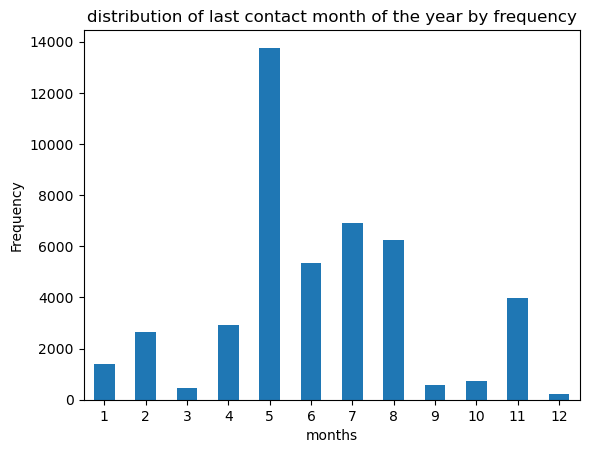

In [28]:
df['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('months')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('distribution of last contact month of the year by frequency')
plt.show()

In [29]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

* The categorical data, all seem to be balanced except for **'defaults'** which is highly imbalanced.
* **'job'** has a high cardinality- many unique categories, which can lead to challenges in modeling and interpretation. Thus, we may need to group some categories together

### Target Feature

In [30]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

* The target feature also seems to be imbalanced, noting that various techniques will need be considered to handle the imbalance.

### Save Cleaned Data  

In [31]:
df.to_csv('bank_data_cleaned.csv', index=False)

### Summary

The dataset seems clean and doesn't have any missing or duplicate values. It's organized in a 'long' format and doesn't require any reshaping. By analyzing the numerical variables' statistics and frequency distribution, I've identified a few potential issues like out-of-range data or outliers. 
##### My initial observations include:
* Variables like `pdays`, `campaign`, and `duration` are skewed and have clustered values towards the lower end.
* `previous` representing past contacts, has limited variability, mostly having 0 values. An outlier with the value of '275' seems like an error.
* `age`, `balance`, `duration`, and `day` appear within expected ranges with a more-or-less typical distributions.
* Around 81.7% of clients were never contacted previously, aligning with the 87.7% of clients with`'previous` value as 0.
* `campaign` i.e the number of contacts performed during this campaign - shows a few instances with values over 30, possibly due to a longer campaign duration.
*  Lastly, looking into the categorical variables, they appear to be mostly balanced, except `defaults`, which is highly imbalanced. `job` has many unique categories, which may need potential grouping before modeling. The target feature `y`is imbalanced, possibly requiring techniques to address this issue lateron before modeling .
